# Projeto 3#
#### Antonio Fonseca, Daniel Pucciariello e José Bechara.####

## Tema:##
*Prever se um projeto do kickstarter irá ser bem sucedido ou não.*

Técnica: Classificador.

https://www.kaggle.com/kemical/kickstarter-projects



In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from datetime import datetime

%matplotlib inline

### Leitura dos dataframes:

In [6]:
data = pd.read_csv('ks-projects-201801.csv', parse_dates=['deadline', 'launched'])

In [9]:
# Removendo os projetos ainda não finalizados:
data = data[data.state != "live"] 
# Dividindo em apenas sucessos e falhas:
data = data.replace("canceled", "failed").replace("undefined", "failed").replace("suspended", "failed")

In [11]:
data.main_category.value_counts(True)

Film & Video    0.168288
Music           0.137383
Publishing      0.105291
Games           0.092970
Technology      0.085648
Design          0.079191
Art             0.074386
Food            0.064965
Fashion         0.060038
Theater         0.028926
Comics          0.028582
Photography     0.028550
Crafts          0.023235
Journalism      0.012568
Dance           0.009977
Name: main_category, dtype: float64

In [12]:
data.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


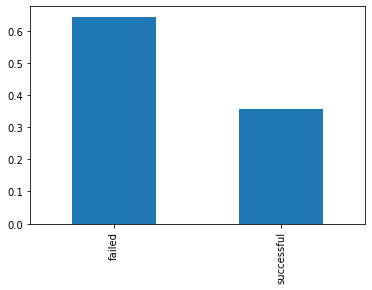

In [14]:
data.state.value_counts(True).plot.bar();